In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from urllib.parse import urlparse
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('web-page-phishing.csv')

# Separate features and target
X = df.drop('phishing', axis=1)  # Features
y = df['phishing']  # Target

# Label Encoding for the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a standard scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train an MLP classifier with batch training and early stopping
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, batch_size='auto', early_stopping=True, validation_fraction=0.1)
model.fit(X_train_scaled, y_train_encoded)

# Calculate accuracy on the test set
test_accuracy = model.score(X_test_scaled, y_test_encoded)
print(f'Test Accuracy: {test_accuracy:.4f}')


# Function to extract features from the URL
def extract_features(url):
    parsed_url = urlparse(url)
    features = {
        'url_length': len(url),
        'n_dots': url.count('.'),
        'n_hypens': url.count('-'),
        'n_underline': url.count('_'),
        'n_slash': url.count('/'),
        'n_questionmark': url.count('?'),
        'n_equal': url.count('='),
        'n_at': url.count('@'),
        'n_and': url.count('&'),
        'n_exclamation': url.count('!'),
        'n_space': url.count(' '),
        'n_tilde': url.count('~'),
        'n_comma': url.count(','),
        'n_plus': url.count('+'),
        'n_asterisk': url.count('*'),
        'n_hastag': url.count('#'),
        'n_dollar': url.count('$'),
        'n_percent': url.count('%'),
        'n_redirection': url.count('http'),
    }
    return pd.DataFrame([features], columns=X.columns)

# Function to predict phishing probability
def predict_phishing(input_url, model, scaler, imputer):
    input_features = extract_features(input_url)
    input_imputed = imputer.transform(input_features)
    input_scaled = scaler.transform(input_imputed)
    phishing_probability = model.predict_proba(input_scaled)[0][1]
    return phishing_probability

# Accept URL input from the user
input_url = input("Enter the URL to check for phishing: ")
phishing_prob = predict_phishing(input_url, model, scaler, imputer)

# Check if phishing probability is greater than 0.5 (50%)
if phishing_prob > 0.5:
    print(f'Phishing probability: {phishing_prob}, This is a phishing website.')
else:
    print(f'Phishing probability: {phishing_prob}, This is not a phishing website.')


Test Accuracy: 0.8914
Enter the URL to check for phishing: https://nesecu.xyz/ncsecu.org
Phishing probability: 0.6877197233403118, This is a phishing website.


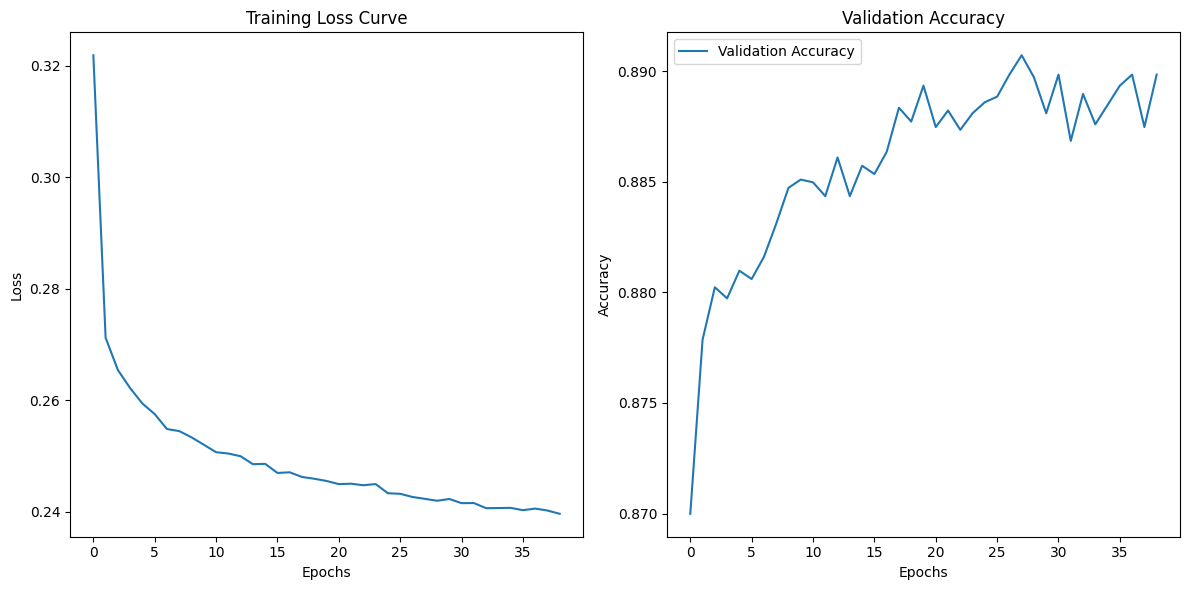

In [ ]:
# Plotting the training loss curve and accuracy graph
plt.figure(figsize=(12, 6))

# Plot Training Loss Curve
plt.subplot(1, 2, 1)
if model.loss_curve_ is not None:
    plt.plot(model.loss_curve_)
    plt.title('Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
if model.validation_scores_ is not None:
    plt.plot(model.validation_scores_, label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()